In [160]:
import pandas as pd
df = pd.read_csv("EV_Stations_data.csv")
df.head()

,Station Name,Street Address,City,Access Days Time,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,New Georeferenced Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


In [161]:
#summary statistics 
# Explore data set and identifying potential features
print(df.info())
print(df.describe().to_string())
print(df.head(5).to_string()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    object
 5   EV Level2 EVSE Num        385 non-null    object
 6   EV DC Fast Count          385 non-null    object
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: object(9)
memory usage: 27.2+ KB
None
                                Station Name Street Address      City Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num EV DC Fast Count EV Other Info      New Georeferenced Column
count                                    385            385       385 

In [162]:
#Checking for null values

# Identify missing values

missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info)


                          Missing Values  Percentage
Station Name                           0         0.0
Street Address                         0         0.0
City                                   0         0.0
Access Days Time                       0         0.0
EV Level1 EVSE Num                     0         0.0
EV Level2 EVSE Num                     0         0.0
EV DC Fast Count                       0         0.0
EV Other Info                          0         0.0
New Georeferenced Column               0         0.0


In [163]:
#Checking for duplicates 
data=pd.DataFrame(df)
duplicates = data.duplicated(keep=False)

# print the duplicate rows
print(data[duplicates])

Empty DataFrame
Columns: [Station Name, Street Address, City, Access Days Time, EV Level1 EVSE Num, EV Level2 EVSE Num, EV DC Fast Count, EV Other Info, New Georeferenced Column]
Index: []


In [164]:
# Rename the columns
df.columns = ['Station_Name', 'Street_Address', 'City', 'Access_Days_Time', 'EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count', 'EV_Other_Info', 'New_Georeferenced_Column']
df.head()


,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


In [165]:

# changing values 'NONE' in columns to be represented by 0
df['EV_Level1_EVSE_Num'] = df['EV_Level1_EVSE_Num'].replace('NONE', 0)
df['EV_Level2_EVSE_Num'] = df['EV_Level2_EVSE_Num'].replace('NONE', 0)
df['EV_DC_Fast_Count'] = df['EV_DC_Fast_Count'].replace('NONE', 0)
print(df.head(4).to_string())

# changing datatype from object to integers

try:
  for col in ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle conversion errors
except:
  pass 

print(df.info())

                          Station_Name          Street_Address          City                    Access_Days_Time EV_Level1_EVSE_Num EV_Level2_EVSE_Num EV_DC_Fast_Count EV_Other_Info              New_Georeferenced_Column
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien                      24 hours daily                  0                  2                0          NONE         POINT (-73.4764687 41.072882)
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden  24 hours daily; for Tesla use only                  0                  0                8          NONE          POINT (-72.773473 41.527367)
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls                      24 hours daily                  0                  1                0          NONE  POINT (-73.065583 41.44548100000001)
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook                      24 hours daily        

In [166]:
# Filter the rows
filtered_df = df[df['Access_Days_Time'] == '24 hours daily; for Tesla use only']

# Display the filtered DataFrame
filtered_df.head(100)

,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,0,0,8,NONE,POINT (-72.773473 41.527367)
6,Corbins Corner Shopping Center - Tesla Superch...,1445 New Britain Ave.,West Hartford,24 hours daily; for Tesla use only,0,0,8,NONE,POINT (-72.759717 41.722672)
18,The Plaza at Buckland Hills - Tesla Supercharger,1470 Pleasant Valley Road,Manchester,24 hours daily; for Tesla use only,0,0,16,NONE,POINT (-72.562282 41.80452)
56,Dunkin' Donuts - Tesla Supercharger,160 Kukas Lane,Waterbury,24 hours daily; for Tesla use only,0,0,8,NONE,POINT (-73.005613 41.53713)
84,Connecticut Welcome Center - Tesla Supercharger,1 West Ave.,Darien,24 hours daily; for Tesla use only,0,0,4,NONE,POINT (-73.504917 41.067306)
94,Connecticut Post Mall - Tesla Supercharger,1201 Boston Post Road,Milford,24 hours daily; for Tesla use only,0,0,14,NONE,POINT (-73.036133 41.238119)
96,New London Mall - Tesla Supercharger,369 N Frontage Rd,New London,24 hours daily; for Tesla use only,0,0,8,NONE,POINT (-72.119376 41.370726)
160,Greenwich Southbound Travel Plaza - Tesla Supe...,2000 Merritt Parkway,Greenwich,24 hours daily; for Tesla use only,0,0,4,NONE,POINT (-73.673445 41.040555)
195,North Canaan Shopping Center - Tesla Supercharger,11 E Main St,North Canaan,24 hours daily; for Tesla use only,0,0,8,NONE,POINT (-73.322808 42.024351)
200,Milford Travel Plaza - Tesla Supercharger,I-95 Milford,Milford,24 hours daily; for Tesla use only,0,0,2,NONE,POINT (-73.009059 41.245823)


In [167]:
# Count the number of rows
count = len(filtered_df)

# Display the count
print(f'The number of rows with "24 hours daily; for Tesla use only" is: {count}')

The number of rows with "24 hours daily; for Tesla use only" is: 19


In [168]:
# Filter the rows that contain the substring 'Tesla'
filtered_df = df[df['Access_Days_Time'].str.contains('Tesla', case=False, na=False)]

# Display the filtered DataFrame
filtered_df.head(100)

count = len(filtered_df)
# Display the count
print(f'The number of rows with "24 hours daily; for Tesla use only" is: {count}')


The number of rows with "24 hours daily; for Tesla use only" is: 22


In [169]:
# # Filter the rows that have 'NONE' in both 'EV_Level1_EVSE_Num' and 'EV_Level2_EVSE_Num'
# filtered_df = df[(df['EV_Level1_EVSE_Num'] == 'NONE') & (df['EV_Level2_EVSE_Num'] == 'NONE')]

# # Count the number of rows
# count = len(filtered_df)

# # Display the count
# print(f'The number of rows with "NONE" in both EV_Level1_EVSE_Num and EV_Level2_EVSE_Num is: {count}')

# # Display the filtered DataFrame
# # filtered_df.head(100)

In [170]:
# Group the rows by 'Access_Days_Time' and display the groups
grouped_df = df.groupby('Access_Days_Time')

# Display each group
for name, group in grouped_df:
    print(f'\nAccess Days Time: {name}')
    group.head(10)


Access Days Time: 10am-8pm M-Th, 10am-6pm F, 10am-5pm Sat, 1pm-5pm Sun (Sunday hours in winter only)

Access Days Time: 11am-10pm daily

Access Days Time: 24 hours daily

Access Days Time: 24 hours daily; 2 hour limit

Access Days Time: 24 hours daily; Tesla users only

Access Days Time: 24 hours daily; for Tesla use only

Access Days Time: 24 hours daily; for customer use only

Access Days Time: 24 hours daily; for customer use only; see front desk for access

Access Days Time: 24 hours daily; for customer use only; see valet for access

Access Days Time: 24 hours daily; for member use only; see valet for access

Access Days Time: 24 hours daily; guest use only; see front desk for access

Access Days Time: 24 hours daily; overnight valet fee

Access Days Time: 24 hours daily; pay lot

Access Days Time: 24 hours daily; pay lot; see attendant for access

Access Days Time: 24 hours daily; permit lot

Access Days Time: 24 hours daily; priority for Connecticut Green Bank employees

Access

In [171]:
# Group the rows by 'Access_Days_Time' and count the number of elements in each group
group_counts = df.groupby('Access_Days_Time').size().reset_index(name='Count')

# Display the counts
print(group_counts.to_string())

                                                                                                                                     Access_Days_Time  Count
0                                                                  10am-8pm M-Th, 10am-6pm F, 10am-5pm Sat, 1pm-5pm Sun (Sunday hours in winter only)      1
1                                                                                                                                     11am-10pm daily      1
2                                                                                                                                      24 hours daily    222
3                                                                                                                        24 hours daily; 2 hour limit      1
4                                                                                                                    24 hours daily; Tesla users only      3
5                                                         

In [172]:
# Assuming you have your data in a DataFrame already

grouped = pd.DataFrame(group_counts)

# Standardize the text to lowercase to handle inconsistencies
grouped['Access_Days_Time'] = grouped['Access_Days_Time'].str.lower()

# Extract common patterns and create new categories
# For example, we can identify different access categories
def categorize_access_days_time(text):
    if 'tesla' in text:
        return 'Tesla'
    elif 'daily' in text or '24 hours' in text:
        return 'Daily'
    elif 'business hours' in text:
        return 'Business Hours'
    elif 'pay lot' in text:
        return 'Pay Lot'
    else:
        return 'Other'

grouped['Category'] = grouped['Access_Days_Time'].apply(categorize_access_days_time)

# Group by the new category and count the occurrences
category_counts = grouped.groupby('Category').sum().reset_index()

# Display the counts
print(category_counts.to_string())

         Category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Access_Da

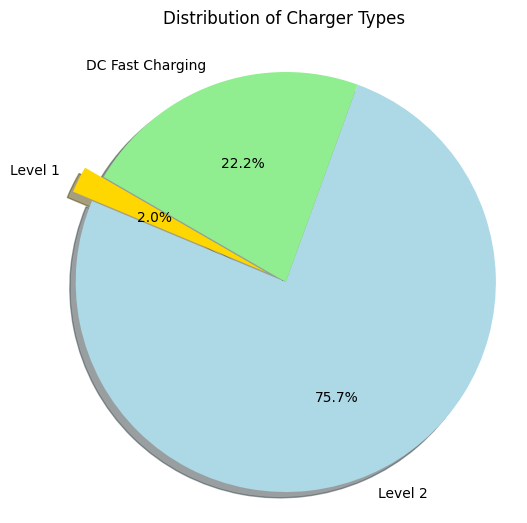

In [173]:

# Piechart representing the total distribution of charger types.

import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns


# Charging Level Distribution 
level1_count = df['EV_Level1_EVSE_Num'].sum()
level2_count = df['EV_Level2_EVSE_Num'].sum()
dc_fast_count = df['EV_DC_Fast_Count'].sum()

counts = [level1_count, level2_count, dc_fast_count]
labels = ['Level 1', 'Level 2', 'DC Fast Charging']
colors = ['gold', 'lightblue', 'lightgreen']
explode = (0.1, 0, 0)

# Create a pie chart 
plt.figure(figsize=(6, 6))  
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=150)  


plt.title('Distribution of Charger Types', pad=20)
plt.axis('equal') 
plt.show()

The pie chart shows the distribution of different types of EV chargers:

Level 1 Chargers: Basic chargers, typically used at home or in places where vehicles are parked for long periods.

Level 2 Chargers: Faster chargers, commonly found in public places such as shopping centers, workplaces, and parking garages.

DC Fast Chargers: High-speed chargers, suitable for quick charging at locations for example highway rest stops and commercial charging stations.

a map showing geographical distribution of the different level charging stations

In [174]:
import folium
from folium.plugins import HeatMap
import re

# Function to extract latitude and longitude from 'New Georeferenced Column'
def extract_lat_lon(geo_str):
    match = re.search(r'POINT \(([-\d.]+) ([-\d.]+)\)', geo_str)
    if match:
        lon, lat = match.groups()
        return float(lat), float(lon)
    return None, None

# Apply the function to create separate 'Latitude' and 'Longitude' columns
df['Latitude'], df['Longitude'] = zip(*df['New_Georeferenced_Column'].apply(extract_lat_lon))

# Convert relevant columns to numeric values
df['EV_DC_Fast_Count'] = pd.to_numeric(df['EV_DC_Fast_Count'], errors='coerce').fillna(0).astype(int)
df['EV_Level2_EVSE_Num'] = pd.to_numeric(df['EV_Level2_EVSE_Num'], errors='coerce').fillna(0).astype(int)
df['EV_Level1_EVSE_Num'] = pd.to_numeric(df['EV_Level1_EVSE_Num'], errors='coerce').fillna(0).astype(int)

# Define a color map for different levels
def get_marker_color(row):
    if row['EV_DC_Fast_Count'] > 0:
        return 'red'
    elif row['EV_Level2_EVSE_Num'] > 0:
        return 'blue'
    elif row['EV_Level1_EVSE_Num'] > 0:
        return 'green'
    else:
        return 'gray'

# Create a map centered around an average location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add charging stations to the map
for idx, row in df.iterrows():
    marker_color = get_marker_color(row)
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station_Name'],
        tooltip=f"{row['City']} - Level1: {row['EV_Level1_EVSE_Num']}, Level2: {row['EV_Level2_EVSE_Num']}, DC Fast: {row['EV_DC_Fast_Count']}",
        icon=folium.Icon(color=marker_color,icon_size=(18, 18),  icon='circle')
    ).add_to(m)

# Display the map
m

In [175]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


calculating distance between pair of charging stations within a particular city

In [176]:
#analyze each city and calculate the distances between charging stations.
# calculating distance between pair of charging stations within a particular city
from geopy.distance import geodesic

def analyze_city(city_data):
    # Calculate the distance between each pair of charging stations in the city
    distances = []
    for i in range(len(city_data)):
        for j in range(i + 1, len(city_data)):
            coord1 = (city_data.iloc[i]['Latitude'], city_data.iloc[i]['Longitude'])
            coord2 = (city_data.iloc[j]['Latitude'], city_data.iloc[j]['Longitude'])
            distance = geodesic(coord1, coord2).kilometers
            distances.append(distance)
    
    # Return the minimum, maximum, and average distances
    if distances:
        return {
            'min_distance': min(distances),
            'max_distance': max(distances),
            'avg_distance': sum(distances) / len(distances),
            'total_stations': len(city_data)
        }
    else:
        return {
            'min_distance': None,
            'max_distance': None,
            'avg_distance': None,
            'total_stations': len(city_data)
        }

# Analyze each city
city_stats = {}
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    city_stats[city] = analyze_city(city_data)

# Convert city_stats to a DataFrame for easy analysis
city_stats_df = pd.DataFrame(city_stats).transpose()
city_stats_df.head()

,min_distance,max_distance,avg_distance,total_stations
Darien,0.023863,4.697350,1.948745,8.0
Meriden,0.117504,2.915612,1.162084,6.0
Beacon Falls,NaN,NaN,NaN,1.0
Old Saybrook,0.020153,5.506738,3.145803,6.0
Fairfield,0.024324,8.796319,2.950214,20.0


In [177]:
# Filter data for a specific city
city_name ='Stamford'
city_data = df[df['City'] == city_name]

# Calculate distances between charging stations in the city
distances = []
for i in range(len(city_data)):
    for j in range(i + 1, len(city_data)):
        coord1 = (city_data.iloc[i]['Latitude'], city_data.iloc[i]['Longitude'])
        coord2 = (city_data.iloc[j]['Latitude'], city_data.iloc[j]['Longitude'])
        distance = geodesic(coord1, coord2).kilometers
        distances.append(distance)

# Calculate min, max, and average distances
min_distance = min(distances) if distances else None
max_distance = max(distances) if distances else None
avg_distance = sum(distances) / len(distances) if distances else None

# Display results
min_distance, max_distance, avg_distance, len(city_data)
print("shortest distance: ", min_distance)
print("longest distance: ", max_distance)
print("average distance: ", avg_distance)
print("number of charging stations in",city_name, "is", len(city_data) )

#len(city_data) calculates the number of charging stations located in the city of 'Stamford'

shortest distance:  0.04205588989784041
longest distance:  6.537291230747307
average distance:  1.81997125829728
number of charging stations in Stamford is 21


In [178]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [179]:
# Feature engineering

# Create a feature for the total number of charging points
df['Total_EVSE_Num'] = df['EV_Level1_EVSE_Num'] + df['EV_Level2_EVSE_Num'] + df['EV_DC_Fast_Count']

print(df.head(4).to_string())

                          Station_Name          Street_Address          City                    Access_Days_Time  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count EV_Other_Info              New_Georeferenced_Column   Latitude  Longitude  Total_EVSE_Num
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien                      24 hours daily                   0                   2                 0          NONE         POINT (-73.4764687 41.072882)  41.072882 -73.476469               2
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden  24 hours daily; for Tesla use only                   0                   0                 8          NONE          POINT (-72.773473 41.527367)  41.527367 -72.773473               8
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls                      24 hours daily                   0                   1                 0          NONE  POINT (-73.065583 41.4454810000

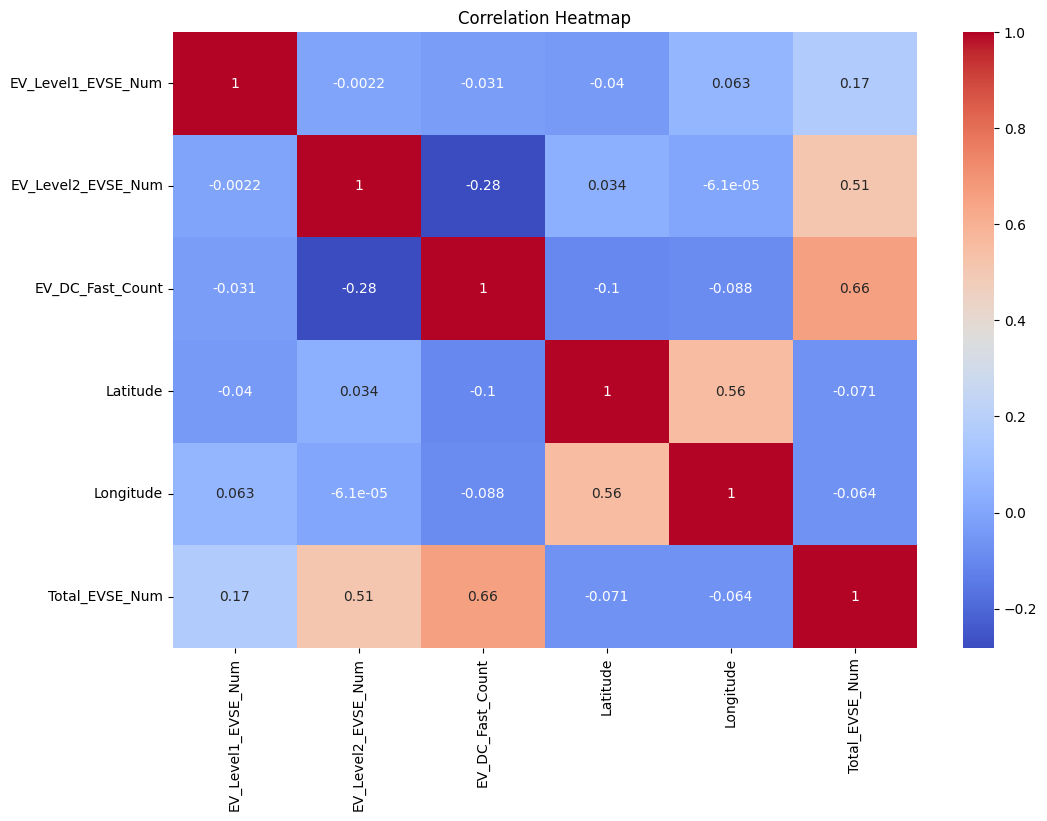

In [180]:
# Heatmap  

numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric= df[numeric_columns] #only the numeric columns are used to calculate the correlations,

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [181]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [182]:
# 3D plot showing the City, longitude and latitudes along with the station names.
import plotly.express as px

fig = px.scatter_3d(df, x='City', y='Longitude', z='Latitude', color='Station_Name')
fig.show()


In [183]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import numpy as np



# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Get coordinates for start and end cities
city_A = "New Fairfield"
city_B = "Fairfield"
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# Function to find nearest charging station
def find_nearest_charging_station(point, stations):
    distances = stations.apply(lambda row: geodesic(point, (row['Latitude'], row['Longitude'])).miles, axis=1)
    nearest_index = distances.idxmin()
    return stations.loc[nearest_index], distances.min()

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, df)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, df)

# Define a function to find stations along the route
def find_stations_along_route(Starting_location, Destination, stations, radius=10):
    route_stations = []
    for _, row in stations.iterrows():
        if geodesic(Starting_location, (row['Latitude'], row['Longitude'])).miles <= radius or \
           geodesic(Destination, (row['Latitude'], row['Longitude'])).miles <= radius:
            route_stations.append(row)
    return pd.DataFrame(route_stations)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, df)

nearest_station_A_info = nearest_station_A[['Station_Name', 'City', 'Latitude', 'Longitude']]
nearest_station_B_info = nearest_station_B[['Station_Name', 'City', 'Latitude', 'Longitude']]

# nearest_station_A_info, distance_to_A, nearest_station_B_info, distance_to_B, stations_along_route
print("stations along route:", city_A , "to", city_B )
print( stations_along_route.to_string())


stations along route: New Fairfield to Fairfield
                               Station_Name         Street_Address           City                                                  Access_Days_Time  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count EV_Other_Info        New_Georeferenced_Column   Latitude  Longitude  Total_EVSE_Num
59                            LIBRARY KIOSK             24 Main St    New Milford                                                    24 hours daily                   0                   1                 0          NONE    POINT (-73.41116 41.5785572)  41.578557 -73.411160               1
102                         WHOLE FOODS MKT      5 Sugar Hollow Rd        Danbury                                                    24 hours daily                   0                   1                 0          NONE   POINT (-73.475576 41.3777667)  41.377767 -73.475576               1
114       Town of New Fairfield - Town Hall        4 Brush Hill Rd  New Fairfield

In [184]:
# Visualizing stations along routes

import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import numpy as np
import plotly.express as px

# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Get coordinates for start and end cities
city_A = "New fairfield"
city_B = "Danbury"
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# Function to find nearest charging station
def find_nearest_charging_station(point, stations):
    distances = stations.apply(lambda row: geodesic(point, (row['Latitude'], row['Longitude'])).miles, axis=1)
    nearest_index = distances.idxmin()
    return stations.loc[nearest_index], distances.min()

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, df)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, df)

# Define a function to find stations along the route
def find_stations_along_route(Starting_location, Destination, stations, radius=10):
    route_stations = []
    for _, row in stations.iterrows():
        if geodesic(Starting_location, (row['Latitude'], row['Longitude'])).miles <= radius or \
           geodesic(Destination, (row['Latitude'], row['Longitude'])).miles <= radius:
            route_stations.append(row)
    return pd.DataFrame(route_stations)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, df)

nearest_station_A_info = nearest_station_A[['Station_Name', 'City', 'Latitude', 'Longitude']]
nearest_station_B_info = nearest_station_B[['Station_Name', 'City', 'Latitude', 'Longitude']]

# Prepare data for visualization
data = {
    'name': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + stations_along_route['Station_Name'].tolist(),
    'Latitude': [Starting_location[0], nearest_station_A['Latitude'], Destination[0], nearest_station_B['Latitude']] + stations_along_route['Latitude'].tolist(),
    'Longitude': [Starting_location[1], nearest_station_A['Longitude'], Destination[1], nearest_station_B['Longitude']] + stations_along_route['Longitude'].tolist(),
    'type': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + ['Charging Station'] * len(stations_along_route),
    'city': [city_A, nearest_station_A['City'], city_B, nearest_station_B['City']] + stations_along_route['City'].tolist(),
    'street_address': [city_A, nearest_station_A['Street_Address'], city_B, nearest_station_B['Street_Address']] + stations_along_route['Street_Address'].tolist()
}

df_vis = pd.DataFrame(data)

# Create the map plot
fig = px.scatter_mapbox(df_vis, lat='Latitude', lon='Longitude', text='name', color='type',
                        hover_data=['city', 'street_address'], mapbox_style='carto-positron', zoom=8, height=600)

# Add lines to connect the points
fig.add_trace(px.line_mapbox(df_vis, lat='Latitude', lon='Longitude').data[0])

# Adjust layout for clarity
fig.update_layout(
    title="Charging Stations Along the Route from Starting Location to Destination",
    margin={"r":0,"t":0,"l":0,"b":0},
    showlegend=True
)

fig.show()

In [188]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import plotly.express as px

# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Function to find the nearest charging station
def find_nearest_charging_station(point, stations):
    distances = stations.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), point).kilometers, axis=1)
    nearest_index = distances.idxmin()
    return stations.loc[nearest_index], distances.min()

# Function to find stations along the route
def find_stations_along_route(start, end, stations, radius=10):
    route_stations = []
    for _, row in stations.iterrows():
        if geodesic(start, (row['Latitude'], row['Longitude'])).kilometers <= radius or \
           geodesic(end, (row['Latitude'], row['Longitude'])).kilometers <= radius:
            route_stations.append(row)
    return pd.DataFrame(route_stations)

# Get coordinates for start and end cities
city_Start = "New Fairfield" # city start A
city_End = "Danbury" # city start B
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# distance_to_A is Distance from each charging station to the starting location (City Start).
# distance_to_B: Distance from each charging station to the destination (City B).

# Pre-calculate distances from each station to starting and ending points
df['distance_to_A'] = df.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), Starting_location).kilometers, axis=1)
df['distance_to_B'] = df.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), Destination).kilometers, axis=1)

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, df)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, df)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, df)

# Prepare data for visualization
data = {
    'name': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + stations_along_route['Station_Name'].tolist(),
    'latitude': [Starting_location[0], nearest_station_A['Latitude'], Destination[0], nearest_station_B['Latitude']] + stations_along_route['Latitude'].tolist(),
    'longitude': [Starting_location[1], nearest_station_A['Longitude'], Destination[1], nearest_station_B['Longitude']] + stations_along_route['Longitude'].tolist(),
    'type': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + ['Charging Station'] * len(stations_along_route),
    'city': [city_Start, nearest_station_A['City'], city_End, nearest_station_B['City']] + stations_along_route['City'].tolist(),
    'street_address': [city_Start, nearest_station_A['Street_Address'], city_End, nearest_station_B['Street_Address']] + stations_along_route['Street_Address'].tolist(),
    'distance_to_A': [None] + [distance_to_A] + [None] + [None] + stations_along_route['distance_to_A'].tolist(),
    'distance_to_B': [None] + [None] + [None] + [distance_to_B] + stations_along_route['distance_to_B'].tolist()
}

df_vis = pd.DataFrame(data)

# Check if the DataFrame has been prepared correctly
print(df_vis.to_string())

# Create the map plot
fig = px.scatter_mapbox(df_vis, lat='latitude', lon='longitude', text='name', color='type',
                        hover_data={'name': True, 'city': True, 'street_address': True,
                                    'distance_to_A': True, 'distance_to_B': True},
                        mapbox_style='carto-positron', zoom=8, height=600)


fig.add_trace(px.line_mapbox(df_vis, lat='latitude', lon='longitude',  text='street_address').data[0])


fig.update_layout(
    title="Charging Stations Along the Route from Starting Location to Destination",
    margin={"r":0,"t":0,"l":0,"b":0},
    showlegend=True
)

fig.show()


                                      name   latitude  longitude               type           city         street_address  distance_to_A  distance_to_B
0                        Starting Location  41.466483 -73.485679  Starting Location  New Fairfield          New Fairfield            NaN            NaN
1                        Nearest Station A  41.465514 -73.487032  Nearest Station A  New Fairfield        4 Brush Hill Rd       0.156091            NaN
2                              Destination  41.394817 -73.454011        Destination        Danbury                Danbury            NaN            NaN
3                        Nearest Station B  41.396042 -73.451059  Nearest Station B        Danbury            21 Delay St            NaN       0.281890
4                          WHOLE FOODS MKT  41.377767 -73.475576   Charging Station        Danbury      5 Sugar Hollow Rd       9.889169       2.615203
5        Town of New Fairfield - Town Hall  41.465514 -73.487032   Charging Station  New

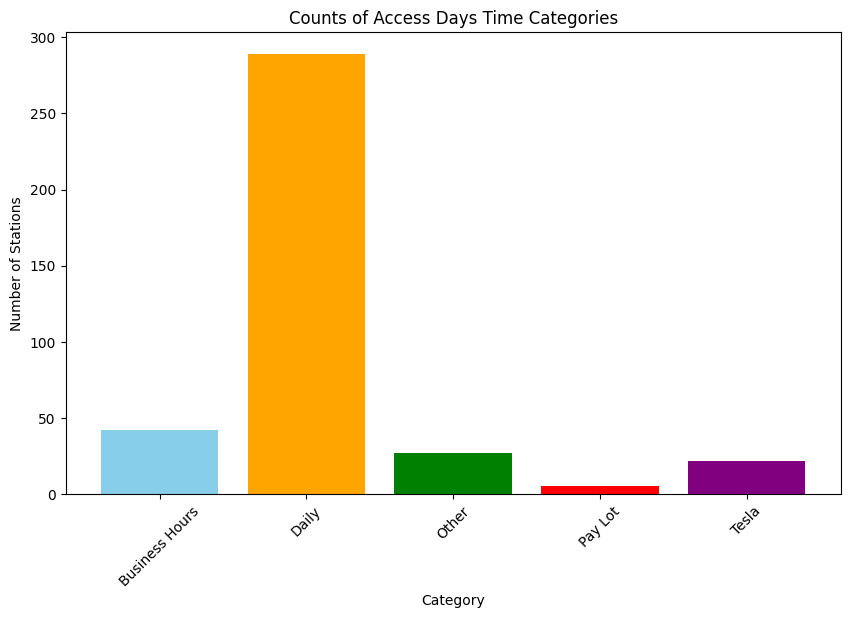

In [ ]:
import matplotlib.pyplot as plt

# Define a list of colors for the bars
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']


# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Category'], category_counts['Count'], color=colors[:len(category_counts)])
plt.xlabel('Category')
plt.ylabel('Number of Stations')
plt.title('Counts of Access Days Time Categories')
plt.xticks(rotation=45)
plt.show()

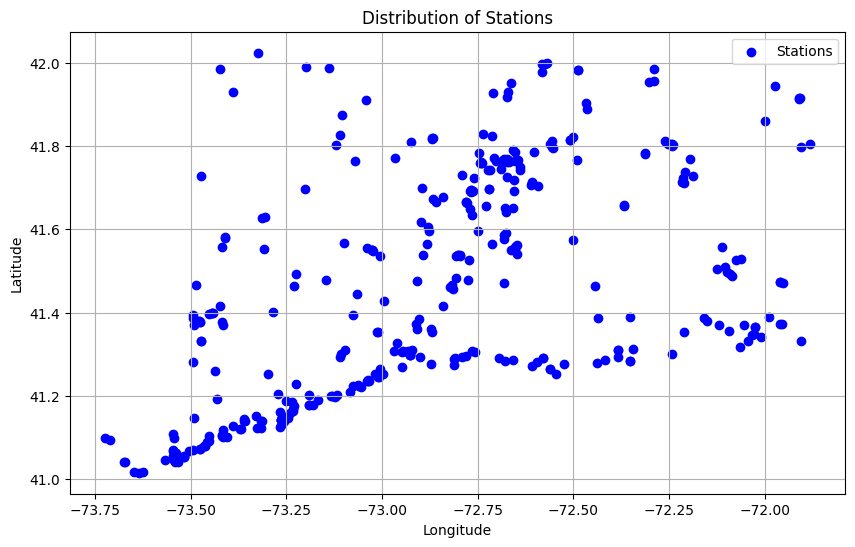

In [ ]:



import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

# Convert the New_Georeferenced_Column to latitude and longitude
df['geometry'] = df['New_Georeferenced_Column'].apply(wkt.loads)
df['Latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['Longitude'] = df['geometry'].apply(lambda geom: geom.x)



# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c='blue', marker='o', label='Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Stations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import numpy as np

# Calculate the bounding box
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()

# Function to calculate the distance between two lat/lon points in miles
def haversine(lon1, lat1, lon2, lat2):
    R = 3958.8  # Earth radius in miles
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate the width and height of the bounding box in miles
width = haversine(min_lon, min_lat, max_lon, min_lat)
height = haversine(min_lon, min_lat, min_lon, max_lat)

# Calculate the total area in square miles
total_area_sq_miles = width * height

# Count the number of stations
num_stations = len(df)

# Calculate the density of stations per square mile
density_stations_per_sq_mile = num_stations / total_area_sq_miles

# Print the results
print(f'Total area: {total_area_sq_miles:.2f} square miles')
print(f'Number of stations: {num_stations}')
print(f'Density of stations: {density_stations_per_sq_mile:.2f} stations per square mile')

Total area: 6689.14 square miles
Number of stations: 385
Density of stations: 0.06 stations per square mile


In [ ]:
df.head()

,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column,Latitude,Longitude,Total_EVSE_Num,geometry
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,0,2,0,NONE,POINT (-73.4764687 41.072882),41.072882,-73.476469,2,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,0,0,8,NONE,POINT (-72.773473 41.527367),41.527367,-72.773473,8,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,0,1,0,NONE,POINT (-73.065583 41.44548100000001),41.445481,-73.065583,1,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,0,2,0,NONE,POINT (-72.3825 41.3102778),41.310278,-72.382500,2,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,0,2,0,NONE,POINT (-73.264511 41.143125),41.143125,-73.264511,2,POINT (-73.264511 41.143125)


In [ ]:

#Availability and Count of Charging Levels
# count occurrences of each EV level
level1_count = df[df['EV_Level1_EVSE_Num'] != 0].shape[0]
level2_count = df[df['EV_Level2_EVSE_Num'] != 0].shape[0]
dc_fast_count = df[df['EV_DC_Fast_Count'] != 0].shape[0]

# Print the counts
print(f'EV Level 1 Count: {level1_count}')
print(f'EV Level 2 Count: {level2_count}')
print(f'EV DC Fast Count: {dc_fast_count}')

EV Level 1 Count: 9
EV Level 2 Count: 341
EV DC Fast Count: 54


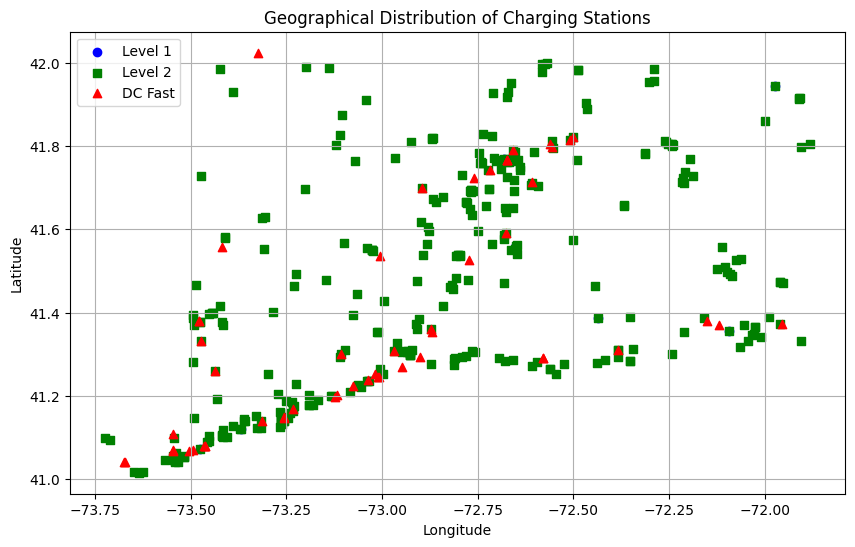

In [ ]:
# Convert the New_Georeferenced_Column to latitude and longitude
df['geometry'] = df['New_Georeferenced_Column'].apply(wkt.loads)
df['Latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['Longitude'] = df['geometry'].apply(lambda geom: geom.x)

# Create separate DataFrames for each type of charging level
df_level1 = df[df['EV_Level1_EVSE_Num'] != 0]
df_level2 = df[df['EV_Level2_EVSE_Num'] != 0]
df_dc_fast = df[df['EV_DC_Fast_Count'] != 0]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df_level1['Longitude'], df_level1['Latitude'], c='blue', marker='o', label='Level 1')
plt.scatter(df_level2['Longitude'], df_level2['Latitude'], c='green', marker='s', label='Level 2')
plt.scatter(df_dc_fast['Longitude'], df_dc_fast['Latitude'], c='red', marker='^', label='DC Fast')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Charging Stations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Usage Patterns
# Count the number of stations with different access times and restrictions
access_time_counts = df['Access_Days_Time'].value_counts()

# Print the access times and their counts
print(access_time_counts)

Access_Days_Time
24 hours daily                                                                                                                                       222
Dealership business hours                                                                                                                             26
24 hours daily; for Tesla use only                                                                                                                    19
24 hours daily; for customer use only                                                                                                                 17
24 hours daily; pay lot                                                                                                                               11
MO: Not Specified; TU: Not Specified; WE: Not Specified; TH: Not Specified; FR: Not Specified; SA: Not Specified; SU: Not Specified                    9
24 hours daily; for customer use only; see front desk for access 

In [ ]:
#Findind the number of stations with in different cities
city_counts = df['City'].value_counts()

# Print the city and their counts
print(city_counts.to_string())

City
Stamford              21
Hartford              20
Fairfield             20
New Haven             13
Danbury               12
Milford               11
Westport              10
Middletown             9
New Britain            9
Norwalk                8
Greenwich              8
Darien                 8
West Hartford          8
Groton                 8
Madison                7
Meriden                6
Waterbury              6
Old Saybrook           6
Branford               6
Manchester             6
East Hartford          5
Norwich                5
Wallingford            5
Storrs                 5
Bridgeport             5
Mansfield              4
Enfield                4
Stratford              4
Glastonbury            4
Hamden                 3
Southington            3
Plainville             3
Orange                 3
Ridgefield             3
Putnam                 3
Stafford Springs       3
Wethersfield           3
New Milford            3
Newington              3
Mystic              

count
1-3 stations     90
4-7 stations     15
7-11 stations     9
12+ stations      5
Name: count, dtype: int64


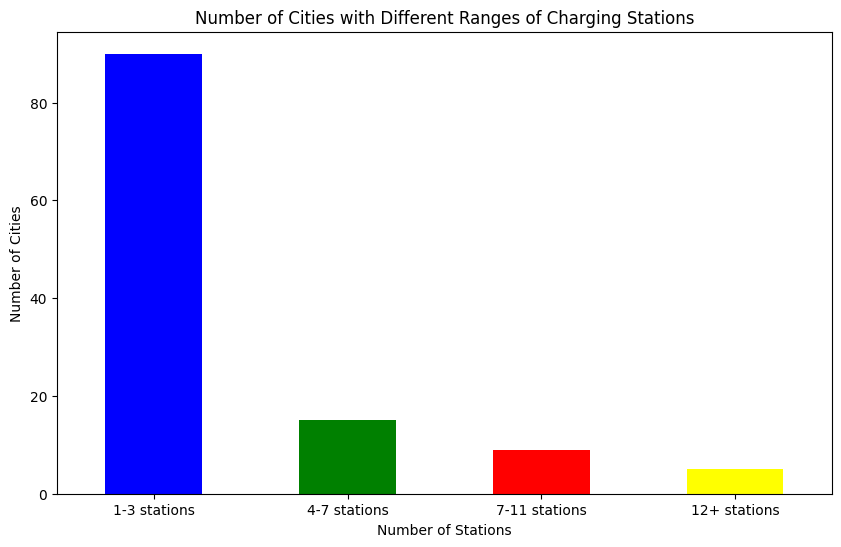

In [ ]:
# Converting  the dictionary to a DataFrame
city_counts = pd.Series(city_counts)

# Define bins for the ranges
bins = [0, 3, 7, 11, city_counts.max()]
labels = ['1-3 stations', '4-7 stations', '7-11 stations','12+ stations']

# Cut the city counts into the specified bins
city_bins = pd.cut(city_counts, bins=bins, labels=labels, right=True)

# Count the number of cities in each bin
bin_counts = city_bins.value_counts().sort_index()

# Print the bin counts
print(bin_counts)

# Plot the data
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Number of Stations')
plt.ylabel('Number of Cities')
plt.title('Number of Cities with Different Ranges of Charging Stations')
plt.xticks(rotation=0)
plt.show()

                   City  Count
0              Stamford     21
1              Hartford     20
2             Fairfield     20
3             New Haven     13
4               Danbury     12
5               Milford     11
6              Westport     10
7            Middletown      9
8           New Britain      9
9               Norwalk      8
10            Greenwich      8
11               Darien      8
12        West Hartford      8
13               Groton      8
14              Madison      7
15              Meriden      6
16            Waterbury      6
17         Old Saybrook      6
18             Branford      6
19           Manchester      6
20        East Hartford      5
21              Norwich      5
22          Wallingford      5
23               Storrs      5
24           Bridgeport      5
25            Mansfield      4
26              Enfield      4
27            Stratford      4
28          Glastonbury      4
29               Hamden      3
30          Southington      3
31      

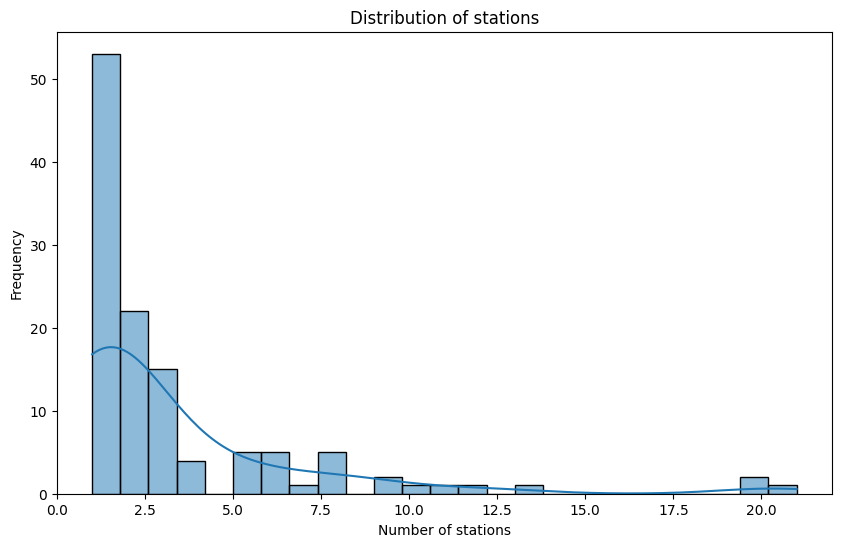

In [ ]:
import seaborn as sns

# Convert the Series to a DataFrame for easier handling
data = city_counts.reset_index()
data.columns = ['City', 'Count']

print(data.to_string())

# Visualize the distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Count'].dropna(), kde=True)
plt.title('Distribution of stations')
plt.xlabel('Number of stations')
plt.ylabel('Frequency')
plt.show()

      Station_Category  Count
0         Level 2 only    322
1         DC Fast only     42
2  Level 2 and DC Fast     12
3        Level 1 and 2      7
4         Level 1 only      2


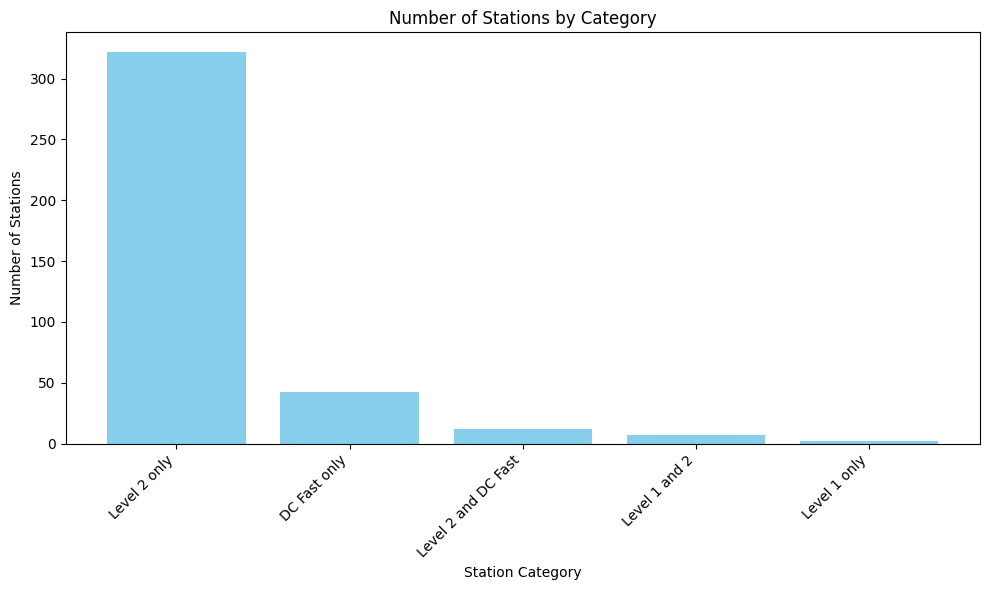

In [ ]:
# Create a new column to categorize the stations
def categorize_station(row):
    level1 = row['EV_Level1_EVSE_Num'] > 0
    level2 = row['EV_Level2_EVSE_Num'] > 0
    dc_fast = row['EV_DC_Fast_Count'] > 0
    
    if level1 and not level2 and not dc_fast:
        return 'Level 1 only'
    elif not level1 and level2 and not dc_fast:
        return 'Level 2 only'
    elif not level1 and not level2 and dc_fast:
        return 'DC Fast only'
    elif level1 and level2 and not dc_fast:
        return 'Level 1 and 2'
    elif level1 and not level2 and dc_fast:
        return 'Level 1 and DC Fast'
    elif not level1 and level2 and dc_fast:
        return 'Level 2 and DC Fast'
    elif level1 and level2 and dc_fast:
        return 'Level 1, 2, and DC Fast'
    else:
        return 'Other'

df['Station_Category'] = df.apply(categorize_station, axis=1)

# Count the number of stations in each category
category_counts = df['Station_Category'].value_counts().reset_index()
category_counts.columns = ['Station_Category', 'Count']

print(category_counts)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Station_Category'], category_counts['Count'], color='skyblue')
plt.title('Number of Stations by Category')
plt.xlabel('Station Category')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Data splitting, model evaluation

In [194]:
# Data splitting, traning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df[['Longitude', 'Latitude']]
y = df['EV_Level2_EVSE_Num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(model, X, y, cv=5)
mean_cv_score = scores.mean()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("mean cross validation score:", mean_cv_score)
print("mse score:", mse)
print("r2 score:", r2)


mean cross validation score: -0.043114443648357745
mse score: 2.477947065993489
r2 score: -0.006697831593490244


In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [196]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

(mse_dt, r2_dt, mse_rf, r2_rf)

# mse_dt: Mean Squared Error for the Decision Tree model.
# r2_dt: R^2 Score for the Decision Tree model.
# mse_rf: Mean Squared Error for the Random Forest model.
# r2_rf: R^2 Score for the Random Forest model.

(3.3376623376623376,
 -0.3559682061121008,
 2.677003896103896,
 -0.08756722625736613)

The vast majority of the stations fall under the "Level 2 only" category, indicating that Level 2 chargers are the most common type of EV charger available.
A smaller number of stations provide "DC Fast only" chargers. This indicates that while DC Fast chargers are available, they are not as prevalent as Level 2 chargers.
There are even fewer stations that offer both "Level 2 and DC Fast" chargers. This suggests that combined charging options are less common
Stations that provide both "Level 1 and 2" chargers are minimal. This could be because Level 1 chargers are generally slower and less preferred by users compared to Level 2 chargers.
NB: There is no Station that provides the all three types of chargers in the State

# Actionable Insights
Increase DC Fast Chargers: With the rising number of EVs and the demand for faster charging options, increasing the number of DC Fast chargers could enhance user convenience and attract more EV users.


